# 013. Seaborn Advanced

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

- Bar Plot  : bar 길이가 비율을 표시  
- Count Plot : y 축 variable 의 observation 수
- Point Plot : bar plot 과 같은 의미를 다른 style 로 표시. 서로 다른 높이의 point 로 표시

### 타이타닉호 승객의 생존 여부 분석 시각화

In [8]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### barplot

- 포인트 추정치 및 신뢰 구간을 직사각형 막대로 표시합니다. 

- 타이타닉호 남녀 성별 객실 등급별 생존 확률 표시

<AxesSubplot:xlabel='sex', ylabel='survived'>

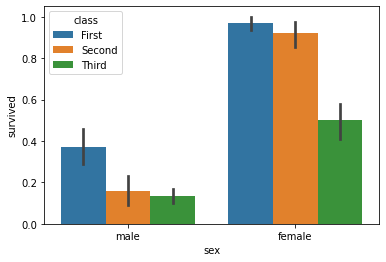

In [3]:
sns.barplot(x='sex', y='survived', hue="class", data=df)

### countplot

- 막대를 사용하여 각 범주형 bin의 관측치 수를 표시합니다.  

- 타이타닉호 객실 등급별 생존 sample 수 표시

<AxesSubplot:xlabel='class', ylabel='count'>

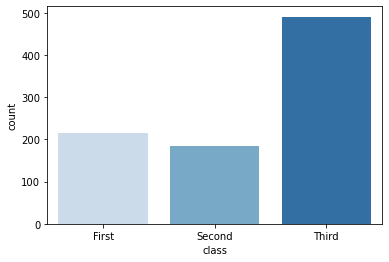

In [4]:
sns.countplot(x='class', data=df, palette="Blues")

### pointplot

- 포인트 플롯은 산점도 포인트의 위치에 따른 숫자 변수의 중심 경향 추정치(평균, 중앙값)를 나타내며 오차 막대를 사용하여 해당 추정치 주변의 불확실성에 대한 일부 표시를 제공합니다.

- 타이타닉호 남녀 성별, class 별 생존 확률의 변화 표시

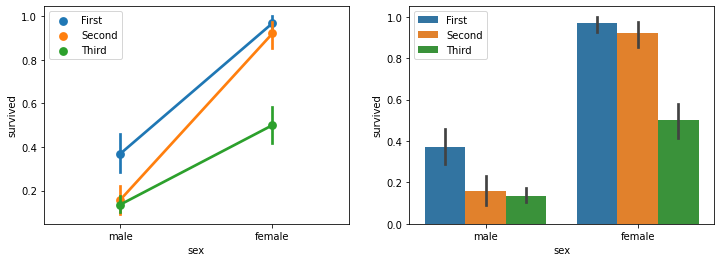

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
sns.pointplot(x='sex', y='survived', hue="class", data=df, ax=ax1);
ax1.legend(loc="upper left")
# pointplot 과 비교
sns.barplot(x='sex', y='survived', hue="class", data=df, ax=ax2);
ax2.legend(loc="upper left")
plt.show()

## Wide Form 의 Data 표시

- 대부분의 경우 세로로 길거나 tidy 한 dataset 이 선호되지만 가로로 긴 wide-form dataset 의 경우 지금까지와 같은 plot 을 세로로 표시

### iris.feature_names : 

Sepal Length : 꽃받침 길이  
Sepal Width  : 꽃받침 너비   
Petal Length  : 꽃잎 길이  
Petal Width   :  꽃잎 너비 

Species (꽃의 종류) :  setosa / versicolor / virginica 의 3종류로 구분된다.

<AxesSubplot:>

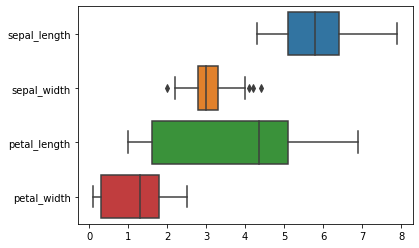

In [9]:
df = sns.load_dataset("iris")
sns.boxplot(data=df, orient="h")

<AxesSubplot:>

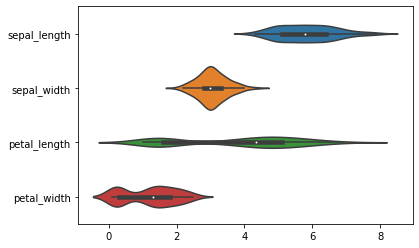

In [10]:
sns.violinplot(data=df, orient="h")

## Linear Relationship

- regplot  
    - regplot ()은 단순 선형 회귀 모델 피팅 및 플롯을 수행합니다. 
    - 95% confidence interval 을 함께 표시

### tip column 을 대상으로 하여 각 dinner의 팁 금액을 예측합니다.

In [11]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

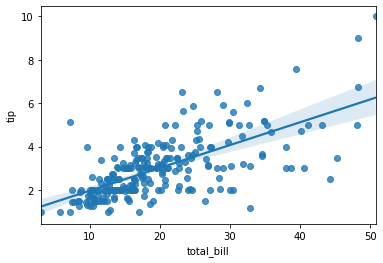

In [12]:
sns.regplot(x="total_bill", y="tip", data=tips)   # 연속형 변수

- color, marker 종류, 크기 조절

Text(0.5, 1.0, 'Linear Regresson Plot')

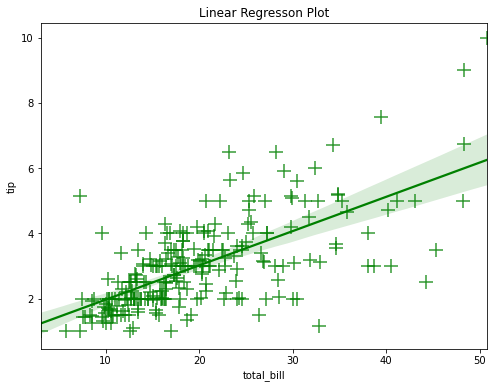

In [13]:
plt.figure(figsize=(8, 6))
ax = sns.regplot(x="total_bill", y="tip", data=tips, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='total_bill', ylabel='tip') # add x- and y-labels
ax.set_title('Linear Regresson Plot') # add title

## Facet Grid

- data 의 subset 으로 histogram 을 그려 비교하는 것을 매우 쉽게 할 수 있다.


- 이산형 변수를 기준으로 row, col, hue 의 3 차원 구조를 형성.  


- FacetGrid에 데이터프레임과 구분할 row, col, hue 등을 전달해 객체 생성

    - row : FacetGrid 의 row 정의  
    - col : FacetGrid 의 column 정의
    - hues : data 의 색 구분  
    
    
- FacetGrid.map() 함수를 이용하여 실제 시각화. 따라서 동일한 종류의 plot을 그린다

In [14]:
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [15]:
# column 구분
tips['time'].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Dinner', 'Lunch']

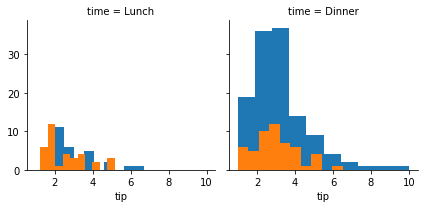

In [16]:
g = sns.FacetGrid(tips, col="time", hue="sex")
g.map(plt.hist, "tip");

- 여성보다 남성이 더 tip을 많이 주고, 점심 보다 저녁에 더 tip 이 많음을 볼 수 있다.

- 남, 녀별로 흡연, 비흡연자의 전체 음식값 대비 tip 의 산점도 plot

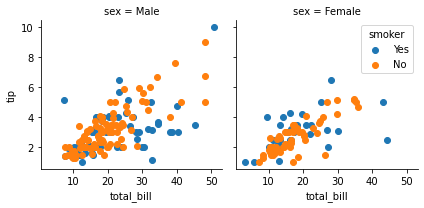

In [17]:
g = sns.FacetGrid(tips, col='sex', hue='smoker')
g.map(plt.scatter, "total_bill", "tip")
plt.legend(title='smoker')

In [18]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


- 점심, 저녁의 식사값 대비 tip 비율 비교

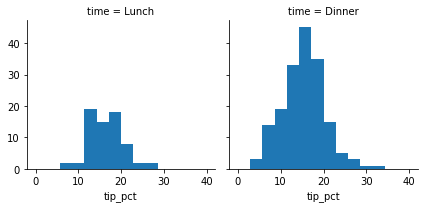

In [24]:
grid = sns.FacetGrid(tips, col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

- 남, 녀 별로 점심, 저녁의 식사값 대비 tip 비율 비교

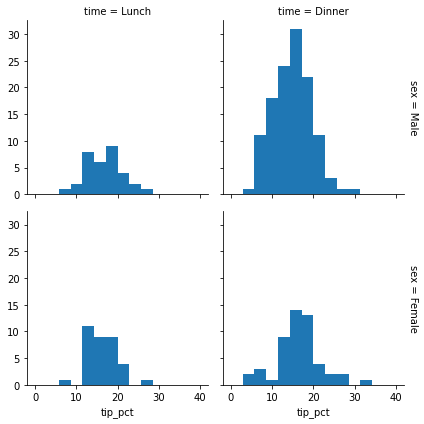

In [19]:
grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

## Pair Grid

- FacetGrid 와 차이점은 각 subplot 마다 다른 pair 의 변수를 사용한다는 것과 matrix 구조을 이루는 것


- 사용법은 FacetGrid 와 같다. grid 를 초기화 하고 plot 함수를 pass 시킨다.

In [20]:
df = sns.load_dataset('iris')
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


전체 pair 를 scatter plot 으로 그린다.

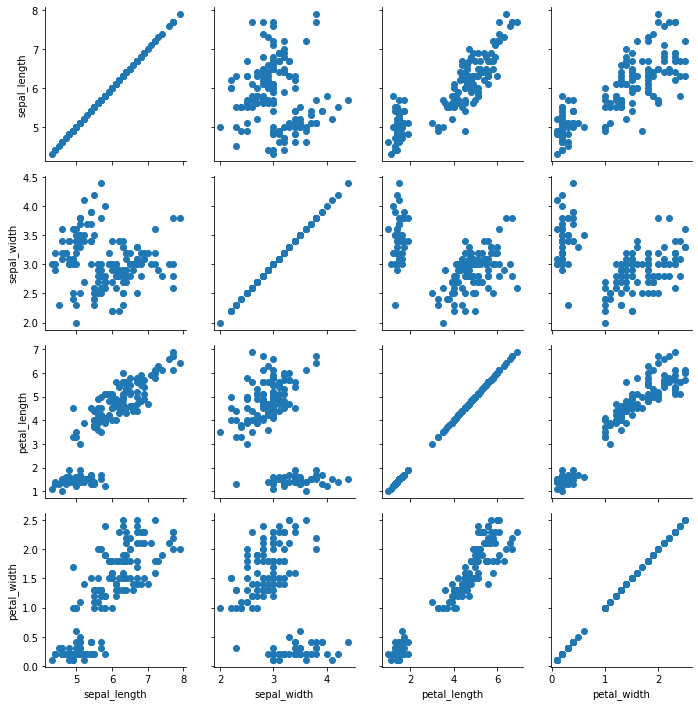

In [21]:
g = sns.PairGrid(df)
g.map(plt.scatter) 

다른 함수를 이용하여 대각선에 각 column 의 univariate distribution 을 표시할 수도 있다.  

ex) 대각선은 histogram. 대각선 외에는 scatter plot 을 그리는 경우

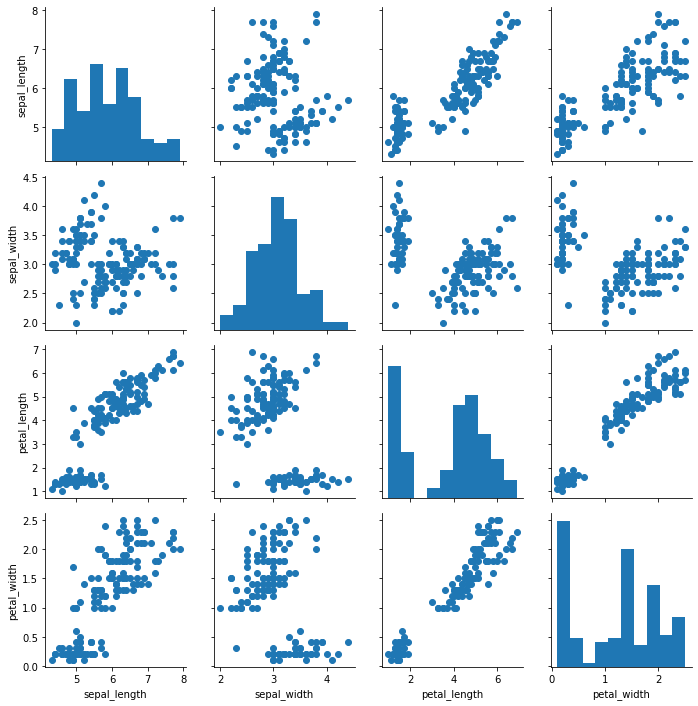

In [25]:
g = sns.PairGrid(df)

g.map_diag(plt.hist)

g.map_offdiag(plt.scatter)

hue parameter 에 species column 을 지정하면 한 pair plot 에 3 차원 정보 표현

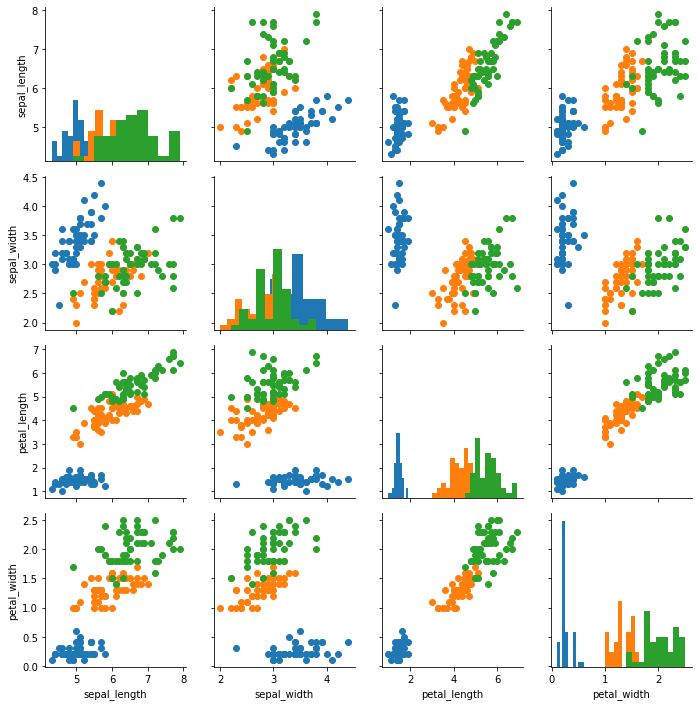

In [26]:
g = sns.PairGrid(df, hue="species")

g.map_diag(plt.hist)

g.map_offdiag(plt.scatter)

- matrix 의 상삼각(map_upper)과 하삼각(map_lower)에 각각 다른 함수를 적용할 수도 있다.

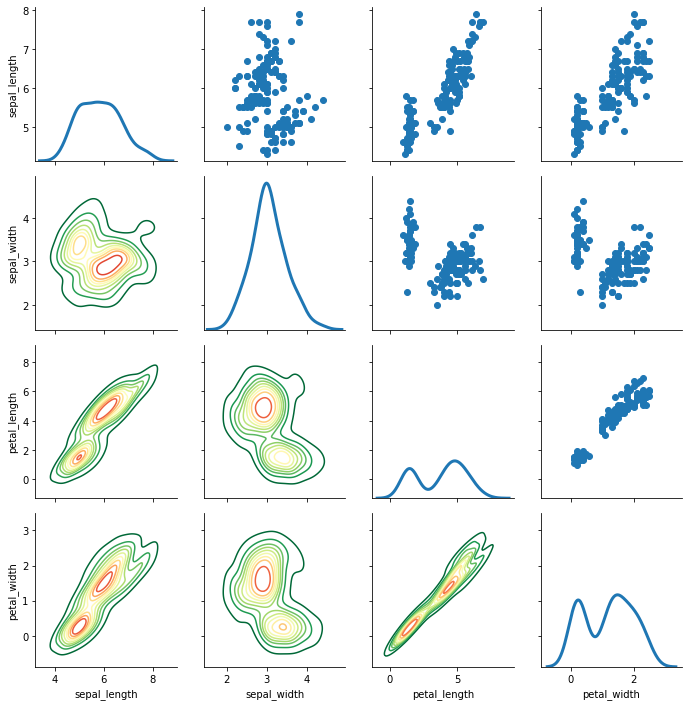

In [49]:
g = sns.PairGrid(df)

g.map_upper(plt.scatter)

g.map_lower(sns.kdeplot, cmap="RdYlGn_r")

g.map_diag(sns.kdeplot, lw=3)

## heatmap

<AxesSubplot:>

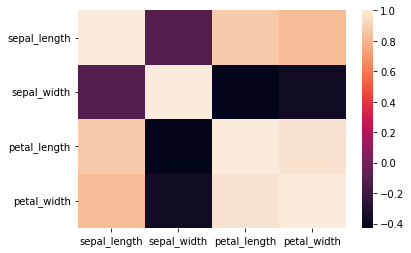

In [22]:
corr = df.corr()

sns.heatmap(corr)